In [1]:
# YES/NO data dictionary

YES = 1
NO = 2
NOT_APPLY = 97
IGNORED = 98
NOT_SPECIFIED = 99


# Laboratory result dictionary
LAB_POSITIVE  = 1
LAB_NO_POSITIVE = 2
LAB_PENDING_RESULT = 3
LAB_WRONG_RESULT = 4
LAB_NOT_APPLY = 97 # CASO SIN MUESTRA


In [2]:
import json
from os import environ
from os.path import join

input_folder = environ.get('CROSSCOMPUTE_INPUT_FOLDER', 'tests/standard/input')
output_folder = environ.get('CROSSCOMPUTE_OUTPUT_FOLDER', 'tests/standard/output')
settings_path = join(input_folder, 'settings.json')
d = json.load(open(settings_path, 'rt'))
d

{'utility_name': 'Impacto de COVID 19 en Mexico'}

In [3]:
import tempfile

data_dir = tempfile.TemporaryDirectory()
data_dir.name

'/tmp/tmp41nvgcrz'

In [4]:
import requests
import tempfile

temp_file = tempfile.NamedTemporaryFile(mode='wb', delete=False)
chunk_size=128

covid_data_url = 'http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip'
covid_zip_data = temp_file.name
covid_zip_file = temp_file.file

response = requests.get(covid_data_url, stream=True)

for chunk in response.iter_content(chunk_size=chunk_size):
    temp_file.write(chunk)

temp_file.close()

covid_zip_data


'/tmp/tmpcnk6kumz'

In [5]:
from zipfile import ZipFile
import os

data_dir.cleanup()
covid_csv_data = ''


# with ZipFile(covid_zip_data, 'r') as zip:
#     zip.extractall(data_dir.name)
    
# for root, dirs, files in os.walk(data_dir.name):
#     if dirs == [] and files != []:
#         covid_csv_data = os.path.join(root, files[0])
#         print(covid_csv_data)

In [6]:
import pandas as pd

covid_pd = pd.read_csv(covid_zip_data, compression='zip', header=0, )
covid_pd.set_index('ID_REGISTRO')

# covid_pd.groupby('RESULTADO_LAB').size()


,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
z482b8,2021-05-06,1,12,9,2,9,9,12,1,2020-10-16,...,2,2,97,2,97,1,99,México,97,97
z49a69,2021-05-06,1,12,23,1,23,23,4,2,2020-07-20,...,1,2,97,2,97,2,99,México,97,1
z23d9d,2021-05-06,1,12,22,2,24,22,9,1,2021-01-05,...,2,2,97,2,97,6,99,México,97,97
z24953,2021-05-06,1,12,9,1,9,9,10,1,2020-10-15,...,1,1,2,2,97,7,99,México,97,97
zz8e77,2021-05-06,1,12,9,2,9,9,2,1,2020-04-16,...,2,2,97,2,97,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9f2664,2021-05-06,2,4,9,1,9,9,3,1,2021-04-30,...,1,2,97,1,1,3,99,México,97,97
79560e,2021-05-06,2,12,17,1,17,17,29,1,2021-04-27,...,1,2,97,1,2,7,99,México,97,97
bb7733,2021-05-06,2,4,15,1,9,15,39,1,2021-04-30,...,2,2,97,1,1,3,99,México,97,97


# Total de Casos y Mortalidad padecimiento

In [7]:
import matplotlib.pyplot as plt

cv19_confirmed_cases  = covid_pd[covid_pd['RESULTADO_LAB'] == YES]

pneumonia_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['NEUMONIA'] == YES]
diabetes_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['DIABETES'] == YES]
epoc_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['EPOC'] == YES]
asma_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['ASMA'] == YES]
inmusupr_confirmed_cases  = cv19_confirmed_cases[cv19_confirmed_cases['INMUSUPR'] == YES]
hyper_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['HIPERTENSION'] == YES]
# others_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['OTRAS_COM'] == YES]
cardio_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['CARDIOVASCULAR'] == YES]
obesity_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['OBESIDAD'] == YES]
renal_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['RENAL_CRONICA'] == YES]

# 
smoking_confirmed_cases = cv19_confirmed_cases[cv19_confirmed_cases['TABAQUISMO'] == YES]



TOTAL_POSITIVE_COV19_CASES = cv19_confirmed_cases.shape[0] # len(list(filter(lambda x: x, covid_pd['RESULTADO_LAB'] == YES)))
TOTAL_PNEUMONIA_CASES = pneumonia_confirmed_cases.shape[0]

print(TOTAL_POSITIVE_COV19_CASES)

def percentage_died(df):
  part = who_died(df).shape[0]
  whole = df.shape[0]
  percentage = 100 * float(part)/float(whole)
  return f'{int(percentage)}%'

def who_died(df):
    return df[df['FECHA_DEF'] != '9999-99-99']

diseases_dfs = [
        diabetes_confirmed_cases,
        pneumonia_confirmed_cases,
        epoc_confirmed_cases, 
        asma_confirmed_cases,
        inmusupr_confirmed_cases,
        hyper_confirmed_cases,
        cardio_confirmed_cases,
        obesity_confirmed_cases,
        renal_confirmed_cases,
        smoking_confirmed_cases,
]

cases_by_disease = pd.DataFrame.from_dict({
    'Padecimiento': ['Diabetes', 'Neumonia', 'EPOC', 'Asma', 'Inmunosuprecion', 'Hipertension', 'Cardiovascular', 
                     'Obesidad', 'Renal cronica', 'Tabaquismo'],
    'Positivos': [
        diabetes_confirmed_cases.shape[0],
        pneumonia_confirmed_cases.shape[0],
        epoc_confirmed_cases.shape[0], 
        asma_confirmed_cases.shape[0],
        inmusupr_confirmed_cases.shape[0],
        hyper_confirmed_cases.shape[0],
        cardio_confirmed_cases.shape[0],
        obesity_confirmed_cases.shape[0],
        renal_confirmed_cases.shape[0],
        smoking_confirmed_cases.shape[0],
    ],
    'Muertes': [
        who_died(diabetes_confirmed_cases).shape[0],
        who_died(pneumonia_confirmed_cases).shape[0],
        who_died(epoc_confirmed_cases).shape[0], 
        who_died(asma_confirmed_cases).shape[0],
        who_died(inmusupr_confirmed_cases).shape[0],
        who_died(hyper_confirmed_cases).shape[0],
        who_died(cardio_confirmed_cases).shape[0],
        who_died(obesity_confirmed_cases).shape[0],
        who_died(renal_confirmed_cases).shape[0],
        who_died(smoking_confirmed_cases).shape[0],
    ],
    'Porcentaje de Muerte': [
        percentage_died(diabetes_confirmed_cases),
        percentage_died(pneumonia_confirmed_cases),
        percentage_died(epoc_confirmed_cases), 
        percentage_died(asma_confirmed_cases),
        percentage_died(inmusupr_confirmed_cases),
        percentage_died(hyper_confirmed_cases),
        percentage_died(cardio_confirmed_cases),
        percentage_died(obesity_confirmed_cases),
        percentage_died(renal_confirmed_cases),
        percentage_died(smoking_confirmed_cases),
    ],
})

cases_by_disease = cases_by_disease.set_index('Padecimiento')

cases_by_disease.to_csv(join(output_folder, 'table1.csv'))


cases_by_disease



1665713


,Positivos,Muertes,Porcentaje de Muerte
Padecimiento,,,
Diabetes,244638,68598,28%
Neumonia,289506,134775,46%
EPOC,21441,8135,37%
Asma,38941,3303,8%
Inmunosuprecion,15633,4061,25%
Hipertension,315622,82912,26%
Cardiovascular,29416,9305,31%
Obesidad,264614,41147,15%
Renal cronica,28671,12211,42%


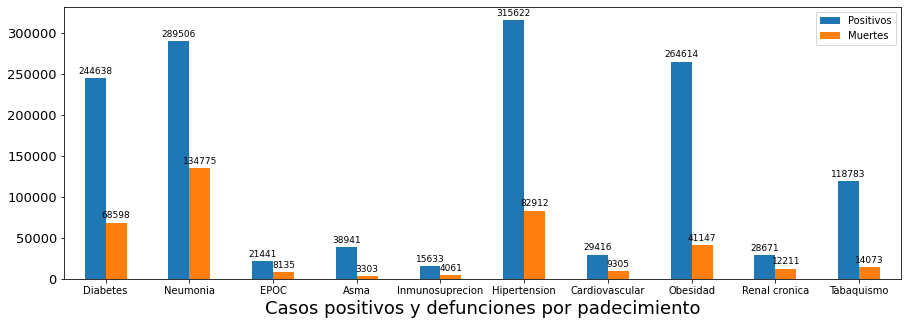

In [8]:
import matplotlib.pyplot as plt

cases_by_disease

ax = cases_by_disease.plot.bar(rot=0, figsize=(15,5))

plt.yticks(fontsize = 13)
plt.xlabel('Casos positivos y defunciones por padecimiento', fontsize = 18)



# add value label to each bar, displayng its height
for p in ax.patches:
    ax.annotate(p.get_height(),
                         (p.get_x() + p.get_width()/2., p.get_height()),
                        ha = 'center', va = 'center', xytext = (0,7), textcoords = 'offset points', size=9)

# save Figure 7 as an image
plt.savefig(join(output_folder, 'figure1.png'))

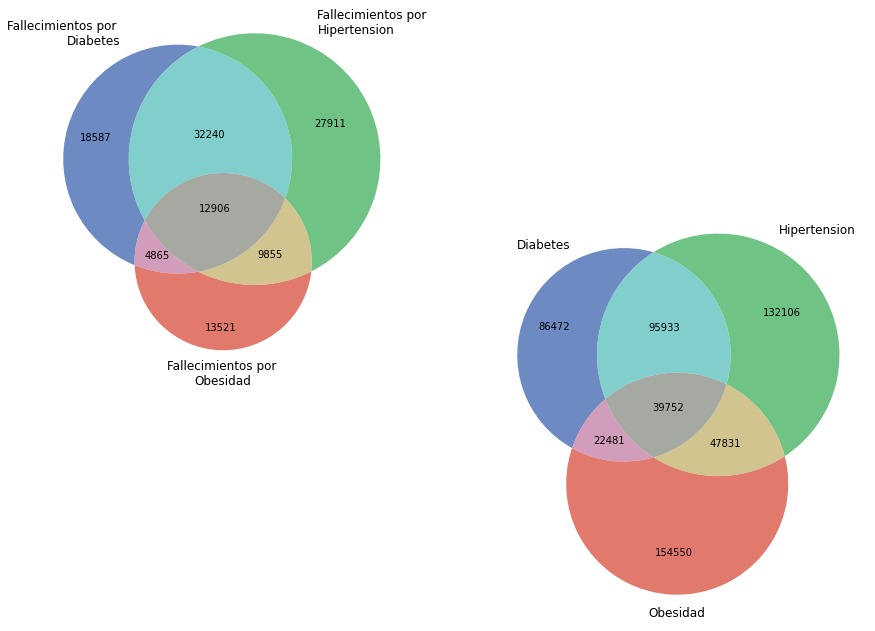

<Figure size 432x288 with 0 Axes>

In [9]:
from matplotlib_venn import venn3, venn3_circles

major_diseases = [set(diabetes_confirmed_cases['ID_REGISTRO']), 
             set(hyper_confirmed_cases['ID_REGISTRO']), 
             set(obesity_confirmed_cases['ID_REGISTRO'])]

major_diseases_deaths = [set(who_died(diabetes_confirmed_cases)['ID_REGISTRO']), 
             set(who_died(hyper_confirmed_cases)['ID_REGISTRO']), 
             set(who_died(obesity_confirmed_cases)['ID_REGISTRO'])]
fig, ax = plt.subplots(1, 2, figsize=(15, 15))



venn3(major_diseases,
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('Diabetes', 
                    'Hipertension',
                    'Obesidad'),
      alpha=0.75)


# venn3_circles(major_diseases, lw=0.7)

plt.subplot(2, 2, 1)

venn3(major_diseases_deaths,
      set_colors=('#3E64AF', '#3EAF5D', '#D74E3B'), 
      set_labels = ('Fallecimientos por \nDiabetes', 
                    'Fallecimientos por \nHipertension',
                    'Fallecimientos por \nObesidad'),
      alpha=0.75)


# venn3_circles(major_diseases_deaths, lw=0.7)


plt.xlabel('Casos positivos agrupados por padecimientos y su interseccion', fontsize = 18)

plt.show()

plt.savefig(join(output_folder, 'figure2.png'))